In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
pharma = pd.read_csv('SOBI.ST.csv', index_col=('Date'), parse_dates=True)

In [4]:
pharma.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-09-15,50.182209,51.078320,48.389988,49.958179,49.958179,4624610
2006-09-18,51.974430,51.974430,50.182209,50.854294,50.854294,820054
2006-09-19,51.302345,52.870541,51.078320,52.870541,52.870541,1470282
2006-09-20,52.870541,53.094570,51.526375,51.974430,51.974430,700582
2006-09-21,52.422485,52.870541,51.750404,52.870541,52.870541,567217


<AxesSubplot:xlabel='Date'>

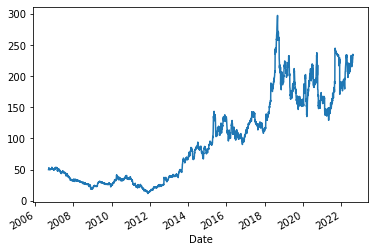

In [5]:
pharma['Close'].plot()

In [6]:
data = pharma.copy()

In [7]:
data['Buy'] = np.zeros(len(data))
data['Sell'] = np.zeros(len(data))

In [8]:
data['RollingMax'] = data['Close'].shift(1).rolling(window=28).max()
data['RollingMin'] = data['Close'].shift(1).rolling(window=28).min()
data.loc[data['RollingMax'] < data['Close'], 'Buy'] = 1
data.loc[data['RollingMin'] > data['Close'], 'Sell'] = -1

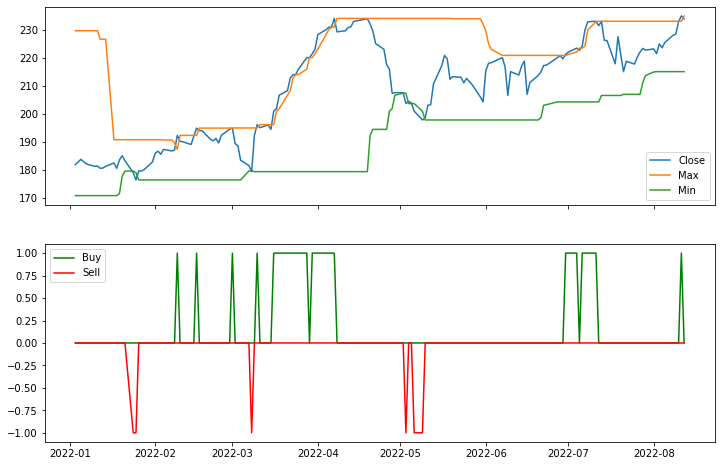

In [9]:
start = '2022'
end = '2022'
fig, ax=plt.subplots(2, figsize=(12, 8), sharex=True) 
ax[0].plot(data['Close'][start:end])
ax[0].plot(data['RollingMax'][start:end])
ax[0].plot(data['RollingMin'][start:end])
ax[0].legend(['Close', 'Max', 'Min'])
ax[1].plot(data['Buy'][start:end], c='g')
ax[1].plot(data['Sell'][start:end], c='r')
ax[1].legend(['Buy', 'Sell'])